# Central Tendency, Dispersion

## Central Tendency

Where is the data _centered_?

1. mean - sensitive to outliers
2. median
3. mode / frequency
4. quantile


### Frequency

Frequency - number of times a value appears in the datast

Can be done with `dict` or `Counter`

In [67]:
import numpy as np

# set up some data...

# kind of like rolling two six-sided dice
rolls = np.random.randint(1, 6, 1000) + np.random.randint(1, 6, 1000)

### Counting with a Dictionary

In [16]:
counts = {}
for n in rolls:
   counts[n] = counts.get(n, 0)  + 1
   
counts

{8: 119, 7: 163, 4: 116, 6: 189, 10: 43, 3: 88, 9: 78, 2: 36, 5: 168}

In [17]:
# also ... with try/except, in, update
counts = {}
for val in rolls:
    try:
        counts[val] += 1
    except:
        counts[val] = 1
print(counts)        

counts = {}
for val in rolls:
    if val in counts:
        counts[val] += 1
    else:
        counts[val] = 1
print(counts)        
        
counts = {}
for val in rolls:
    counts.update({val: counts.get(val, 0) + 1})
print(counts)        

{8: 119, 7: 163, 4: 116, 6: 189, 10: 43, 3: 88, 9: 78, 2: 36, 5: 168}
{8: 119, 7: 163, 4: 116, 6: 189, 10: 43, 3: 88, 9: 78, 2: 36, 5: 168}
{8: 119, 7: 163, 4: 116, 6: 189, 10: 43, 3: 88, 9: 78, 2: 36, 5: 168}


### Counting with Counter

Or, u no... you can just use a `Counter`. It's a sublcass of dictionary; you can pass it a list, and it'll count the items for you. Keys are _things_ you're counting, values are the actual counts.

In [68]:
from collections import Counter
c = Counter(rolls)
c

Counter({5: 183, 6: 210, 4: 130, 8: 101, 2: 40, 7: 153, 9: 72, 10: 42, 3: 69})

In [69]:
c.most_common()

[(6, 210),
 (5, 183),
 (7, 153),
 (4, 130),
 (8, 101),
 (9, 72),
 (3, 69),
 (10, 42),
 (2, 40)]

In [70]:
c.most_common(2)

[(6, 210), (5, 183)]

### Mean, Median, and Mode

* mean: _average_ 
* median: "middle" value (half of the values fall under this)
* mode: most frequently occurring value

In [71]:
mean = lambda data: sum(data) / len(data)

In [74]:
def median(data):
    d = sorted(data)
    i = len(d) // 2
    # if even, mean of two middle values
    return d[i] if len(d) % 2 == 1 else mean(d[i-1: i+1])

In [73]:
print(median([1, 2, 3, 5, 6, 7]))
print(median([2, 3, 5, 6, 7]))

4.0
5


In [1]:
mode = lambda data: Counter(data).most_common(1)[0][0]

# of course, we can do with dictionaries as well
def mode(data):
    counts = {}
    for val in rolls:
        if val in counts:
            counts[val] += 1
        else:
            counts[val] = 1
    # y, this is ridiculous, sry!
    return sorted(counts.items(), key=lambda t: t[1])[-1][0] if len(counts) > 0 else None

In [82]:
mode(rolls)

6

In [83]:
median(rolls)

6.0

In [84]:
mean(rolls)

5.929

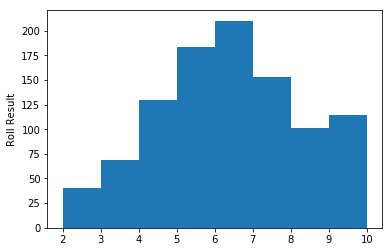

In [85]:
# bonus! what does this data set of rolls actually _look_ like???
import numpy as np
from matplotlib import pyplot as plt
plt.hist(rolls, bins=(max(rolls) - min(rolls)))
plt.ylabel('Roll Result');

### Percentile / 100-Quantile

Value under which some given percent of ordered data falls. (There are _other_ quantiles, like percentiles, tertiles, quartiles, etc. ...)

In [86]:
quantile = lambda p, data: sorted(data)[int(p * len(data))]

# uh... btw, we're using our book definition here which truncates the index
# ...but there are other methods of finding the index / actual value... such 
# as "nearest rank" (round up) and some sort of interpolation (which means
# value won't actually be in original set!)

In [87]:
nums = [22, 12, 1, 5, 6, 2, 3, 20, 12, 8]
sorted(nums)

[1, 2, 3, 5, 6, 8, 12, 12, 20, 22]

In [88]:
median(nums)

7.0

In [89]:
# typically the 50th percentile is the median, but we truncated so 🤷
quantile(0.50, nums)

8

In [90]:
# numpy's percentile implementation agrees with our median calculation tho!
np.percentile(nums, 50)

7.0

## Dispersion


How _spread apart_ is the data?

1. variance
2. standard deviation - sensitive to outliers
    * mean absolute deviation also possible
3. middle 50% (interquartile range)


### range
* range of values... max and min again
* range is 0 if max and min are the same (no spread / data not dispersed... all points are the same!)
* larger range, obvs means min and max are far apart

... but that only describes max and min, what about all the other values?

### population variance 

* variance - describes variability or spread of distribution
* kind of like calculating difference from mean for all points, and getting the average of that
* but! instead of just the difference, we square the difference
* how to calculate variance:
  1. it's the average of the squared differences from the Mean
  2. calculate mean
  3. for every data point... subtract the mean and square the result .
  4. average of all differences (divide by number of data points)
  


In [101]:
# assuming population variance (most libs will allow you to change this)
def variance(data):
    # for every number, subtract the mean, sq the result
    mu = mean(data)
    # sum of sq differences
    return sum((x - mu) ** 2 for x in data) / len(data)

In [102]:
data = [600, 470, 170, 430, 300]
variance(data)

21704.0

In [103]:
variance(rolls)

1.9236760000000002

### population standard deviation  

* to get back to original units (rather than squares), use standard deviation.
    * calculate: square root of variance
    * can help describe how far away a value is from _normal_


In [104]:
def standard_deviation(data):
    return variance(data) ** 0.5

In [105]:
standard_deviation(data)

147.32277488562318

### variance and standard deviation

* y square???
  * mix of negative and positive numbers will "cancel" out (we want to compare distance; remove sign)
  * magnifies extremes, tho (good or bad?)
  * why not absolute value? yes, this is also a measure of dispersion
  * http://www.leeds.ac.uk/educol/documents/00003759.htm
  * https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia
  * historically, std dev has been used... also more consistent when calculating from repeated sampling of population
* population vs sample
  * for population, use n
  * sample... n - 1 rather than n so that we can have larger values (using the actual number of data points in the sample can result in a lower value)
    * using n for the sample ends up as an understimate (since mean is calculated from sample, rather than population... if sample clusters together, then variance is smol / understimate)
    * how to make larger? divide by smaller number, n - 1

### Interquartile Range / Midspread

Variance and standard deviation sensitive to outliers 

Another measure of dispersion that is not as sensitive to outliers is interquartile range... (also nknown as middle 50%, midspread)

* use quantile to calculate val at 0.75
* use quantile to calculate val at 0.25


In [106]:
def iqr(data):
    return quantile(0.75, data) - quantile(0.25, data)

In [107]:
rolls = np.random.randint(1, 6, 1000)

In [108]:
mean(rolls)

2.976

In [109]:
mode(rolls)

1

In [110]:
variance(rolls)

2.037423999999964

In [111]:
standard_deviation(rolls)

1.4273836204748758

In [113]:
iqr(rolls)

2

In [114]:
median(rolls)

3.0